# Neural Network Basics: How we build a simple neural network from the ground up

## 1. The neuron, weights, and biases

### From Biology to Artificial Intelligence
In the human brain, neurons are specialized cells that process and transmit information. They receive signals from other neurons, process this information, and then decide whether to send a signal to other neurons. Artificial neurons in neural networks work similarly, mimicking this biological process in a simplified way.

### The structure of a neuron
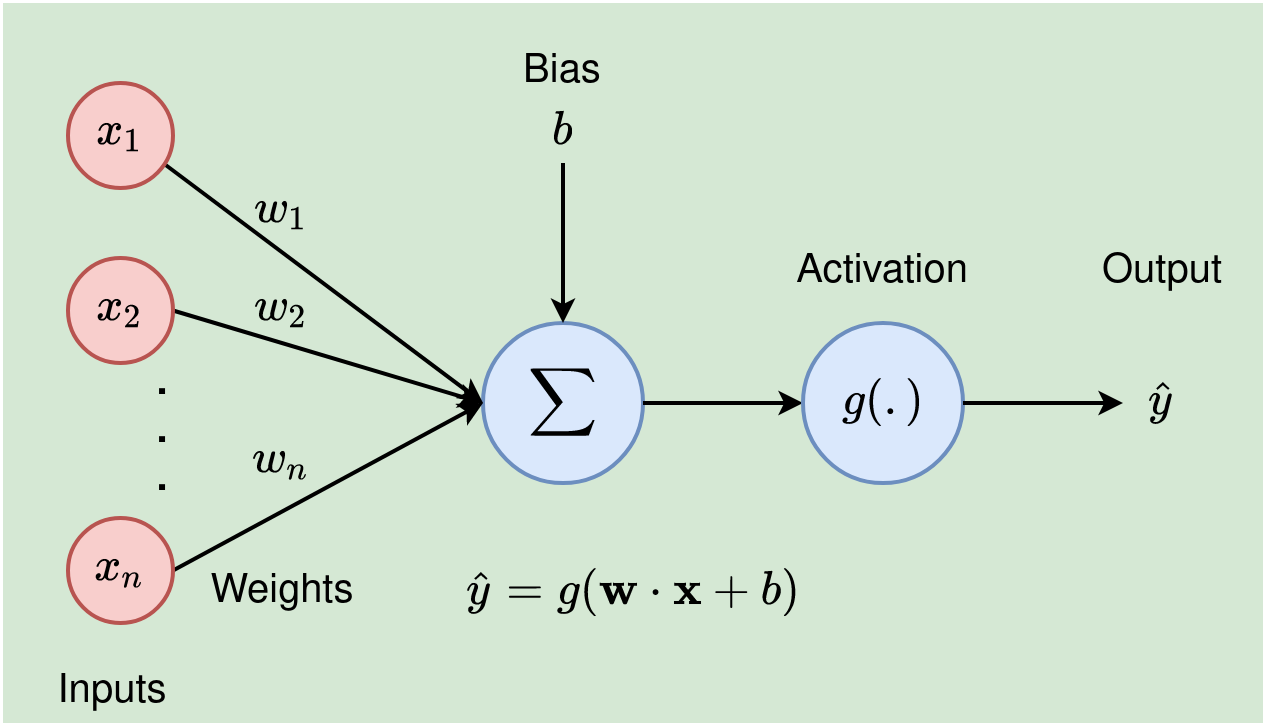

This is a neuron with two inputs, one bias, and one output. The output is calculated as the weighted sum of the inputs plus the bias, passed through an activation function.

An example of now we can use this neuron to make a prediction goes something like this:



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, widgets
from IPython.display import display, HTML, clear_output

# Generate random data with a linear decision boundary
np.random.seed(0)
num_points = 200
X = np.random.rand(num_points, 2)
y = (X[:, 1] > -0.5 * X[:, 0] + 1).astype(int)

# Define the neural network
class SimpleNN:
    def __init__(self):
        self.weights = np.random.randn(2)
        self.bias = 0
    
    def forward(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)
    
    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

# Create the neural network
nn = SimpleNN()

# Visualization function
def visualize_nn(w1, w2, b):
    nn.weights = np.array([w1, w2])
    nn.bias = b
    
    # Create a meshgrid with negative values
    xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 140), np.linspace(-0.2, 1.2, 140))
    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    
    # Make predictions
    Z = nn.predict(X_mesh).reshape(xx.shape)
    
    # Calculate accuracy
    predictions = nn.predict(X)
    accuracy = np.mean(predictions == y) * 100
    
    # Plot decision boundary
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title(f'Decision Boundary (Accuracy: {accuracy:.2f}%)')
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
    
    # Visualize neural network
    plt.subplot(122)
    plt.axis('off')
    plt.text(0.1, 0.9, 'Input Layer', ha='center', va='center', fontsize=12, fontweight='bold')
    plt.text(0.9, 0.9, 'Output Layer\n(Sigmoid)', ha='center', va='center', fontsize=12, fontweight='bold')
    
    # Input neurons
    plt.plot([0.2, 0.2], [0.7, 0.8], 'ko-')
    plt.text(0.1, 0.75, 'X1', ha='right', va='center')
    plt.plot([0.2, 0.2], [0.5, 0.6], 'ko-')
    plt.text(0.1, 0.55, 'X2', ha='right', va='center')
    
    # Output neuron
    plt.plot([0.8, 0.8], [0.6, 0.7], 'ko-')
    plt.text(0.9, 0.65, 'Y', ha='left', va='center')
    
    # Connections
    plt.plot([0.2, 0.8], [0.75, 0.65], 'b-', alpha=abs(w1)/2)
    plt.plot([0.2, 0.8], [0.55, 0.65], 'b-', alpha=abs(w2)/2)
    
    plt.tight_layout()
    plt.show()

# Interactive widget
interact(visualize_nn, 
         w1=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0),
         w2=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0),
         b=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0))

# Explanations
HTML("""
<h2>Interactive Neural Network Tutorial</h2>
<p>Welcome to this interactive tutorial on neural networks! In this notebook, we'll explore how a simple neural network makes decisions and how adjusting its parameters affects its behavior.</p>

<h3>Step 1: Understanding Weights</h3>
<p>We start with a neural network that has two inputs and one output, with no hidden layers. The output is connected to both inputs. The strength of these connections is determined by weights.</p>
<p>Use the sliders labeled w1 and w2 to adjust the weights. Observe how changing these weights affects the decision boundary in the left plot.</p>

<h3>Step 2: Introducing Bias</h3>
<p>You might notice that without a bias, it's impossible to perfectly fit the decision boundary. This is where bias comes in. Bias allows the network to shift the decision boundary.</p>
<p>Now, use the slider labeled b to adjust the bias. Try to find a combination of weights and bias that closely matches the true decision boundary.</p>

<h3>Step 3: Sigmoid Activation</h3>
<p>The output of this network now passes through a sigmoid activation function. This squashes the output between 0 and 1, making it suitable for binary classification tasks.</p>

<h3>Visualization Explanation</h3>
<p>Left plot: Shows the decision boundary of the neural network. The background color represents the network's prediction for each point in the space. The scattered points are our training data. The plot title includes the model's accuracy.</p>
<p>Right plot: Visualizes the structure of the neural network. The thickness of the lines represents the magnitude of the weights.</p>

<p>Experiment with different combinations of weights and bias to see how they affect the network's predictions and accuracy!</p>
""")


interactive(children=(FloatSlider(value=0.0, description='w1', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…

## 2. A more complex example, what if the decision boundary is not linear?

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, widgets
from IPython.display import display, HTML, clear_output

# Generate random data with a curved decision boundary
np.random.seed(0)
num_points = 200
X = np.random.rand(num_points, 2)
y = (X[:, 1] > 0.5 * np.sin(4 * X[:, 0]) + 0.5).astype(int)

# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the neural network
class SimpleNN:
    def __init__(self):
        self.weights1 = np.random.randn(2, 3)
        self.bias1 = np.zeros(3)
        self.weights2 = np.random.randn(3, 1)
        self.bias2 = np.zeros(1)
    
    def forward(self, X):
        hidden = X @ self.weights1 + self.bias1
        output = hidden @ self.weights2 + self.bias2
        return sigmoid(output)
    
    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

# Create the neural network
nn = SimpleNN()

# Visualization function
def visualize_nn(w11, w12, w13, w14, w15, w16, w21, w22, w23, b11, b12, b13, b21):
    nn.weights1 = np.array([[w11, w12, w13], [w14, w15, w16]])
    nn.bias1 = np.array([b11, b12, b13])
    nn.weights2 = np.array([[w21], [w22], [w23]])
    nn.bias2 = np.array([b21])
    
    # Create a meshgrid with negative values
    xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 140), np.linspace(-0.2, 1.2, 140))
    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    
    # Make predictions
    Z = nn.predict(X_mesh).reshape(xx.shape)
    
    # Calculate accuracy
    predictions = nn.predict(X)
    accuracy = np.mean(predictions == y) * 100
    
    # Plot decision boundary
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title(f'Decision Boundary (Accuracy: {accuracy:.2f}%)')
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
    
    # Visualize neural network
    plt.subplot(122)
    plt.axis('off')
    plt.text(0.1, 0.9, 'Input Layer', ha='center', va='center', fontsize=12, fontweight='bold')
    plt.text(0.5, 0.9, 'Hidden Layer', ha='center', va='center', fontsize=12, fontweight='bold')
    plt.text(0.9, 0.9, 'Output Layer', ha='center', va='center', fontsize=12, fontweight='bold')
    
    # Input neurons
    plt.plot([0.2, 0.2], [0.7, 0.8], 'ko-')
    plt.text(0.1, 0.75, 'X1', ha='right', va='center')
    plt.plot([0.2, 0.2], [0.5, 0.6], 'ko-')
    plt.text(0.1, 0.55, 'X2', ha='right', va='center')
    
    # Hidden neurons
    plt.plot([0.5, 0.5], [0.8, 0.9], 'ko-')
    plt.plot([0.5, 0.5], [0.6, 0.7], 'ko-')
    plt.plot([0.5, 0.5], [0.4, 0.5], 'ko-')
    
    # Output neuron
    plt.plot([0.8, 0.8], [0.6, 0.7], 'ko-')
    plt.text(0.9, 0.65, 'Y', ha='left', va='center')
    
    # Connections
    for i, y1 in enumerate([0.75, 0.55]):
        for j, y2 in enumerate([0.85, 0.65, 0.45]):
            plt.plot([0.2, 0.5], [y1, y2], 'b-', alpha=abs(nn.weights1[i, j])/2)
    
    for i, y1 in enumerate([0.85, 0.65, 0.45]):
        plt.plot([0.5, 0.8], [y1, 0.65], 'b-', alpha=abs(nn.weights2[i, 0])/2)
    
    plt.tight_layout()
    plt.show()

# Interactive widget
interact(visualize_nn, 
         w11=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0),
         w12=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0),
         w13=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0),
         w14=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0),
         w15=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0),
         w16=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0),
         w21=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0),
         w22=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0),
         w23=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0),
         b11=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0),
         b12=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0),
         b13=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0),
         b21=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0))

# Explanations
HTML("""
<h2>Interactive Neural Network Tutorial</h2>
<p>Welcome to this interactive tutorial on neural networks! In this notebook, we'll explore how a simple neural network with a hidden layer makes decisions and how adjusting its parameters affects its behavior.</p>

<h3>Step 1: Understanding Weights</h3>
<p>We now have a neural network with two inputs, a hidden layer with three neurons, and one output neuron. Each connection between neurons has a weight associated with it.</p>
<p>Use the sliders labeled w11 to w23 to adjust the weights. Observe how changing these weights affects the decision boundary in the left plot.</p>

<h3>Step 2: Introducing Bias</h3>
<p>Each neuron in the hidden and output layers has a bias. Bias allows the network to shift the decision boundary.</p>
<p>Use the sliders labeled b11 to b21 to adjust the biases. Try to find a combination of weights and biases that closely matches the true decision boundary.</p>

<h3>Step 3: Sigmoid Activation</h3>
<p>The output neuron now uses a sigmoid activation function. This function squashes the output between 0 and 1, making it suitable for binary classification tasks.</p>

<h3>Visualization Explanation</h3>
<p>Left plot: Shows the decision boundary of the neural network. The background color represents the network's prediction for each point in the space. The scattered points are our training data. The plot title includes the model's accuracy.</p>
<p>Right plot: Visualizes the structure of the neural network. The thickness of the lines represents the magnitude of the weights.</p>

<p>Experiment with different combinations of weights and biases to see how they affect the network's predictions and accuracy!</p>
""")


interactive(children=(FloatSlider(value=0.0, description='w11', max=2.0, min=-2.0), FloatSlider(value=0.0, des…

### We see that no matter how many layers we have, the decision boundary is still linear.
### How can we make the decision boundary more complex?

## 3. Activation functions.

In [15]:
def visualize_single_neuron(w1, w2, w3, b, activation_func):
    # Define activation functions
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    def relu(x):
        return np.maximum(0, x)
    
    def tanh(x):
        return np.tanh(x)
    
    # Create input space
    x1 = np.linspace(-5, 5, 100)
    x2 = np.linspace(-5, 5, 100)
    X1, X2 = np.meshgrid(x1, x2)
    
    # Compute neuron output
    Z = w1 * X1 + w2 * X2 + w3 * 1 + b
    
    # Apply activation function
    if activation_func == 'Sigmoid':
        A = sigmoid(Z)
        act_func = sigmoid
    elif activation_func == 'ReLU':
        A = relu(Z)
        act_func = relu
    else:  # Tanh
        A = tanh(Z)
        act_func = tanh
    
    # Create subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
    
    # Plot neuron output
    im = ax1.imshow(A, extent=[-5, 5, -5, 5], origin='lower', aspect='auto', cmap='viridis')
    ax1.set_title('Neuron Output')
    ax1.set_xlabel('Input 1')
    ax1.set_ylabel('Input 2')
    plt.colorbar(im, ax=ax1)
    
    # Plot activation function
    x = np.linspace(-10, 10, 1000)
    y = act_func(x)
    ax2.plot(x, y)
    ax2.set_title(f'{activation_func} Activation Function')
    ax2.set_xlabel('Input')
    ax2.set_ylabel('Output')
    ax2.grid(True)
    
    # Plot neuron diagram
    ax3.set_xlim(-1, 1)
    ax3.set_ylim(-1, 1)
    ax3.axis('off')
    
    # Draw inputs
    ax3.annotate('x1', xy=(-0.8, 0.4), fontsize=12)
    ax3.annotate('x2', xy=(-0.8, 0), fontsize=12)
    ax3.annotate('x3', xy=(-0.8, -0.4), fontsize=12)
    
    # Draw neuron
    circle = plt.Circle((0, 0), 0.2, fill=False)
    ax3.add_artist(circle)
    ax3.annotate(activation_func, xy=(0, 0), ha='center', va='center')
    
    # Draw connections
    weights = [w1, w2, w3]
    for i, w in enumerate(weights):
        color = plt.cm.RdYlBu((w + 2) / 4)  # Map weight to color
        ax3.annotate('', xy=(0, 0), xytext=(-0.8, 0.4 - 0.4*i),
                     arrowprops=dict(arrowstyle='->', color=color, lw=2))
    
    # Draw output
    ax3.annotate('', xy=(0.8, 0), xytext=(0.2, 0),
                 arrowprops=dict(arrowstyle='->', color='k', lw=2))
    ax3.annotate('Output', xy=(0.9, 0), fontsize=12)
    
    # Draw bias
    bias_color = plt.cm.RdYlBu((b + 2) / 4)  # Map bias to color
    ax3.annotate('Bias', xy=(-0.1, -0.4), xytext=(-0.5, -0.4),
                 arrowprops=dict(arrowstyle='->', color=bias_color, lw=2))
    
    ax3.set_title('Neuron Diagram')
    
    plt.tight_layout()
    plt.show()

# Create interactive widgets
w1_slider = widgets.FloatSlider(value=0, min=-2, max=2, step=0.1, description='Weight 1')
w2_slider = widgets.FloatSlider(value=0, min=-2, max=2, step=0.1, description='Weight 2')
w3_slider = widgets.FloatSlider(value=0, min=-2, max=2, step=0.1, description='Weight 3')
b_slider = widgets.FloatSlider(value=0, min=-2, max=2, step=0.1, description='Bias')
activation_dropdown = widgets.Dropdown(options=['Sigmoid', 'ReLU', 'Tanh'], value='Sigmoid', description='Activation:')

# Create interactive output
interactive_output = widgets.interactive_output(visualize_single_neuron, 
                                                {'w1': w1_slider, 'w2': w2_slider, 'w3': w3_slider, 
                                                 'b': b_slider, 'activation_func': activation_dropdown})

# Display widgets and output
display(HTML('<h3>Single Neuron Visualization</h3>'))
display(HTML('<p>Adjust the weights, bias, and activation function to see how they affect the neuron\'s output.</p>'))
display(widgets.VBox([w1_slider, w2_slider, w3_slider, b_slider, activation_dropdown]))
display(interactive_output)


Output()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, widgets
from IPython.display import display, HTML, clear_output

# Generate random data with a curved decision boundary
np.random.seed(0)
num_points = 200
X = np.random.rand(num_points, 2)
y = (X[:, 1] > 0.5 * np.sin(4 * X[:, 0]) + 0.5).astype(int)

# Define activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# Define the neural network
class SimpleNN:
    def __init__(self, hidden_activation='relu'):
        self.weights1 = np.random.randn(2, 3)
        self.bias1 = np.zeros(3)
        self.weights2 = np.random.randn(3, 1)
        self.bias2 = np.zeros(1)
        self.hidden_activation = hidden_activation
    
    def forward(self, X):
        hidden = self.apply_activation(X @ self.weights1 + self.bias1, self.hidden_activation)
        output = sigmoid(hidden @ self.weights2 + self.bias2)
        return output
    
    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)
    
    def apply_activation(self, x, activation):
        if activation == 'relu':
            return relu(x)
        elif activation == 'sigmoid':
            return sigmoid(x)
        elif activation == 'tanh':
            return tanh(x)
        else:
            return x  # linear activation

# Create the neural network
nn = SimpleNN()

# Visualization function
def visualize_nn(w11, w12, w13, w14, w15, w16, w21, w22, w23, 
                 b11, b12, b13, b21, hidden_activation):
    nn.weights1 = np.array([[w11, w12, w13], [w14, w15, w16]])
    nn.bias1 = np.array([b11, b12, b13])
    nn.weights2 = np.array([[w21], [w22], [w23]])
    nn.bias2 = np.array([b21])
    nn.hidden_activation = hidden_activation
    
    # Create a meshgrid with negative values
    xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 140), np.linspace(-0.2, 1.2, 140))
    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    
    # Make predictions
    Z = nn.predict(X_mesh).reshape(xx.shape)
    
    # Calculate accuracy
    predictions = nn.predict(X)
    accuracy = np.mean(predictions.flatten() == y) * 100
    
    # Plot decision boundary
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title(f'Decision Boundary (Accuracy: {accuracy:.2f}%)')
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
    
    # Visualize neural network
    plt.subplot(122)
    plt.axis('off')
    plt.text(0.1, 0.9, 'Input Layer', ha='center', va='center', fontsize=12, fontweight='bold')
    plt.text(0.5, 0.9, f'Hidden Layer\n({hidden_activation})', ha='center', va='center', fontsize=12, fontweight='bold')
    plt.text(0.9, 0.9, 'Output Layer\n(sigmoid)', ha='center', va='center', fontsize=12, fontweight='bold')
    
    # Input neurons
    plt.plot([0.2, 0.2], [0.7, 0.8], 'ko-')
    plt.text(0.1, 0.75, 'X1', ha='right', va='center')
    plt.plot([0.2, 0.2], [0.5, 0.6], 'ko-')
    plt.text(0.1, 0.55, 'X2', ha='right', va='center')
    
    # Hidden neurons
    plt.plot([0.5, 0.5], [0.8, 0.9], 'ko-')
    plt.plot([0.5, 0.5], [0.6, 0.7], 'ko-')
    plt.plot([0.5, 0.5], [0.4, 0.5], 'ko-')
    
    # Output neuron
    plt.plot([0.8, 0.8], [0.6, 0.7], 'ko-')
    plt.text(0.9, 0.65, 'Y', ha='left', va='center')
    
    # Connections
    for i, y1 in enumerate([0.75, 0.55]):
        for j, y2 in enumerate([0.85, 0.65, 0.45]):
            plt.plot([0.2, 0.5], [y1, y2], 'b-', alpha=abs(nn.weights1[i, j])/2)
    
    for i, y1 in enumerate([0.85, 0.65, 0.45]):
        plt.plot([0.5, 0.8], [y1, 0.65], 'b-', alpha=abs(nn.weights2[i, 0])/2)
    
    plt.tight_layout()
    plt.show()

# Interactive widget
w11 = widgets.FloatSlider(min=-2, max=2, step=0.1, value=0, description='W1_1')
w12 = widgets.FloatSlider(min=-2, max=2, step=0.1, value=0, description='W1_2')
w13 = widgets.FloatSlider(min=-2, max=2, step=0.1, value=0, description='W1_3')
w14 = widgets.FloatSlider(min=-2, max=2, step=0.1, value=0, description='W2_1')
w15 = widgets.FloatSlider(min=-2, max=2, step=0.1, value=0, description='W2_2')
w16 = widgets.FloatSlider(min=-2, max=2, step=0.1, value=0, description='W2_3')
w21 = widgets.FloatSlider(min=-2, max=2, step=0.1, value=0, description='W3_1')
w22 = widgets.FloatSlider(min=-2, max=2, step=0.1, value=0, description='W4_1')
w23 = widgets.FloatSlider(min=-2, max=2, step=0.1, value=0, description='W5_1')
b11 = widgets.FloatSlider(min=-2, max=2, step=0.01, value=0, description='B1')
b12 = widgets.FloatSlider(min=-2, max=2, step=0.01, value=0, description='B2')
b13 = widgets.FloatSlider(min=-2, max=2, step=0.01, value=0, description='B3')
b21 = widgets.FloatSlider(min=-2, max=2, step=0.01, value=0, description='B4')
hidden_activation = widgets.Dropdown(options=['relu', 'sigmoid', 'tanh', 'linear'], value='relu', description='Hidden Activation:')

# Group sliders
input_hidden_weights = widgets.VBox([
    widgets.HBox([widgets.Label('Input to Hidden Weights:')]),
    widgets.HBox([widgets.VBox([w11, w12, w13]), widgets.VBox([w14, w15, w16])])
])

hidden_output_weights = widgets.VBox([
    widgets.HBox([widgets.Label('Hidden to Output Weights:')]),
    widgets.HBox([widgets.VBox([w21, w22, w23])])
])

biases = widgets.VBox([
    widgets.HBox([widgets.Label('Biases:')]),
    widgets.HBox([widgets.VBox([b11, b12, b13]), widgets.VBox([b21])])
])

activations = widgets.VBox([
    widgets.HBox([widgets.Label('Hidden Layer Activation Function:')]),
    widgets.HBox([hidden_activation])
])

# Display grouped widgets and interactive visualization
interact(visualize_nn, w11=w11, w12=w12, w13=w13, w14=w14, w15=w15, w16=w16,
         w21=w21, w22=w22, w23=w23,
         b11=b11, b12=b12, b13=b13, b21=b21,
         hidden_activation=hidden_activation)

display(input_hidden_weights, hidden_output_weights, biases, activations)

# Explanations
HTML("""
<h2>Interactive Neural Network Tutorial</h2>
<p>Welcome to this interactive tutorial on neural networks! In this notebook, we'll explore how a simple neural network with a hidden layer makes decisions and how adjusting its parameters affects its behavior.</p>

<h3>Step 1: Understanding Weights</h3>
<p>We now have a neural network with two inputs, a hidden layer with three neurons, and one output neuron. Each connection between neurons has a weight associated with it.</p>
<p>Use the sliders labeled w11 to w23 to adjust the weights. Observe how changing these weights affects the decision boundary in the left plot.</p>

<h3>Step 2: Introducing Bias</h3>
<p>Each neuron in the hidden and output layers has a bias. Bias allows the network to shift the decision boundary.</p>
<p>Use the sliders labeled b11 to b21 to adjust the biases. Try to find a combination of weights and biases that closely matches the true decision boundary.</p>

<h3>Step 3: Activation Functions</h3>
<p>We've now added activation functions to our neural network. You can choose different activation functions for the hidden layer using the dropdown menu. The output layer uses a sigmoid activation function.</p>
<p>Experiment with different activation functions for the hidden layer to see how they affect the network's behavior:</p>
<ul>
    <li>ReLU (Rectified Linear Unit): Often used in hidden layers, good for capturing non-linear patterns.</li>
    <li>Sigmoid: Squashes values between 0 and 1.</li>
    <li>Tanh: Similar to sigmoid but ranges from -1 to 1, can be used in hidden layers.</li>
    <li>Linear: No activation, useful for seeing the raw output of the layer.</li>
</ul>

<h3>Visualization Explanation</h3>
<p>Left plot: Shows the decision boundary of the neural network. The background color represents the network's prediction for each point in the space. The scattered points are our training data. The plot title includes the model's accuracy.</p>
<p>Right plot: Visualizes the structure of the neural network. The thickness of the lines represents the magnitude of the weights. The activation function for the hidden layer is displayed above the layer, and the output layer uses a sigmoid activation.</p>

<p>Experiment with different combinations of weights, biases, and activation functions to see how they affect the network's predictions and accuracy!</p>
""")


interactive(children=(FloatSlider(value=0.0, description='W1_1', max=2.0, min=-2.0), FloatSlider(value=0.0, de…